In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

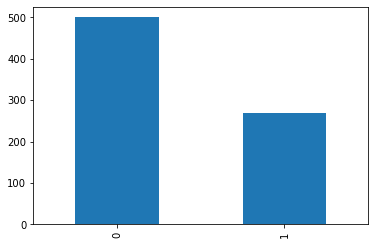

In [7]:
df.Outcome.value_counts().plot(kind='bar')


In [8]:
X = df[['Glucose','BloodPressure']]
y = df['Outcome']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

((614, 2), (154, 2))

In [9]:
m = KNeighborsClassifier()
m.fit(xtrain, ytrain)

KNeighborsClassifier()

In [10]:
m.score(xtest,ytest) # you should not see the score like this, we use other stuff

0.6623376623376623

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
ypred = m.predict(xtest)

In [13]:
import seaborn as sns

In [14]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[76 19]
 [33 26]]


In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        95
           1       0.58      0.44      0.50        59

    accuracy                           0.66       154
   macro avg       0.64      0.62      0.62       154
weighted avg       0.65      0.66      0.65       154



In [16]:
from matplotlib.colors import ListedColormap
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


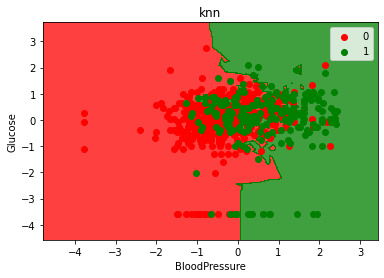

In [17]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"knn",'BloodPressure','Glucose')